In [1]:
from skimage.measure import regionprops

In [2]:
import nyroglancer
import h5py
import numpy as np
from PIL import Image

from os import listdir
from os.path import isfile, join

mypath='/media/songbird/Seagate Expansion Drive/multicut_segm'

mypath2='/media/songbird/Seagate Expansion Drive/8bitcrop seq'
mypath3='/media/songbird/Seagate Expansion Drive/proba_map'

/home/songbird/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data Import + Preparation of 3d Cubes

In [3]:
multicut =[join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

raw=[join(mypath2, f) for f in listdir(mypath2) if isfile(join(mypath2, f))]
proba_map=[join(mypath3, f) for f in listdir(mypath3) if isfile(join(mypath3, f))]


In [4]:
multicut.sort()
proba_map.sort()
raw.sort()
xs=2100
xe=2300

ys=1000
ye=1200

start=450
end=650


multicut=multicut[start:end]
proba_map=proba_map[start:end]
raw=raw[start:end]

In [5]:
len(proba_map)

200

In [6]:
multicut_list=[]

for f in multicut:
    fil=h5py.File(f, 'r')
    data =fil['/exported_data'][xs:xe,ys:ye, :1]
    data=np.transpose(data,axes=(1,0,2))
    
    print data.shape
    print data.dtype
    multicut_list.append(data)

(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)
uint32
(200, 200, 1)

In [7]:
for i in range(1,len(multicut_list)):
    temp=multicut_list[i-1]
    pastlist =list(set(temp.flatten()))
    pastlist.sort()
    indextostitch=pastlist[len(pastlist)-1]
    
    multicut_list[i]=multicut_list[i]+indextostitch

        
    

In [8]:
test=tuple(multicut_list)
multicut_final=np.dstack(test)

In [9]:
multicut_final.shape

(200, 200, 200)

In [10]:

proba_map_list=[]

for f in proba_map:
    fil=h5py.File(f, 'r')
    data =fil['/exported_data'][xs:xe, ys:ye, 1:]
    data=np.transpose(data,axes=(1,0,2))
    print data.dtype
    proba_map_list.append(data)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [11]:
probatuple=tuple(proba_map_list)
proba_final=np.dstack(probatuple)
proba_final=proba_final.astype('float32')

In [12]:
proba_final.shape

(200, 200, 200)

In [11]:
raw_list=[]
i=0
for f in raw:
    imarray=np.array(Image.open(f))
    imarray=imarray[xs:xe,ys:ye]
    imarray=np.reshape(imarray,(imarray.shape[0],imarray.shape[1],1))
    imarray=np.transpose(imarray,axes=(1,0,2))
    raw_list.append(imarray)
    print(i)
    i=i+1

rawtuple=tuple(raw_list)
rawfinal=np.dstack(rawtuple)
rawfinal.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


(200, 200, 200)

In [13]:
import numpy as np
import h5py
h5f = h5py.File('/media/songbird/Seagate Expansion Drive/croped_data.h5', 'w')
h5f.create_dataset('croped_raw', data=rawfinal)

<HDF5 dataset "croped_raw": shape (200, 200, 200), type "|u1">

## Centroids

In [14]:
from skimage import data, util
from skimage.measure import label
label_img = label(multicut_final, connectivity=multicut_final[0].ndim)
props = regionprops(label_img)

indexes_centroids=[]
for i in range(len(props)):
    temp=[]
    tes=props[i].centroid
    temp.append(int(round(tes[0])))
    temp.append(int(round(tes[1])))
    temp.append(int(round(tes[2])))
    k=tuple(temp)
    indexes_centroids.append(k)

In [15]:
props[0].centroid

(5.431372549019608, 3.627450980392157, 0.0)

In [16]:
len(indexes_centroids)

18151

empty_vol=empty_vol.astype('float32')


In [17]:
multicut_final.shape

(200, 200, 200)

## Preparation of 3D Segmentation

In [7]:
from scipy import spatial
import numpy as np
import networkx
print networkx.__version__
import sys
from scipy.spatial.distance import euclidean

import numpy as np
sys.path.insert(0, '/home/songbird/Desktop/skeleton_tools-master/skeleton_tools')
from skeleton_tools import Skeleton, SkeletonContainer

def get_multicut3D(multicut_final, indexes_centroids,r,p=2.0, eps=0.0):
    tree = spatial.KDTree(np.array(indexes_centroids))
    r5=tree.query_pairs(r, p, eps)

    r5=list(r5)



    voxel_size = [5, 5, 5] # the physical length of the voxels
    skeleton = Skeleton(voxel_size=voxel_size)

    for r in r5:
        node0=np.array(tree.data[r[0]])
        node1=np.array(tree.data[r[1]])
        skeleton.add_node(node_id=r[0], pos_voxel=node0) # add two nodes
        skeleton.add_node(node_id=r[1], pos_voxel=node1)
        skeleton.add_edge(r[0], r[1])


    skeleton_collection=SkeletonContainer(skeletons=[skeleton])
    skeleton_collection.split_into_cc()
    #skeleton_collection.write_to_knossos_nml('/home/songbird/Desktop/knossos/traces_test.nml')

    print('skeleton ok')


    
    multicut3D_regionsid=[]
    for sk in skeleton_collection.skeleton_list:
        multicut3D_regionsid.append(sk.get_seg_ids(multicut_final))
    

    
    

    multicut3D=np.zeros(multicut_final.shape)

    index=0
    for region in multicut3D_regionsid:
        for uniqueid in region:
            temp=np.where(multicut_final == uniqueid)
            coordinates=tuple(zip(*temp))
        
            for c in coordinates:
                multicut3D[c[0]][c[1]][c[2]]=index
        index=index+1

    multicut3D=multicut3D.astype(multicut_final.dtype)
    return multicut3D, multicut3D_regionsid


1.11


In [182]:
multicut3D=[]
for i in range(10):
    multicut3D.append(get_multicut3D(multicut_final, indexes_centroids, r=i, p=2.0))
    print(i)

skeleton ok
0
skeleton ok
1
skeleton ok
2
skeleton ok
3
skeleton ok
4
skeleton ok
5
skeleton ok
6
skeleton ok
7
skeleton ok
8
skeleton ok
9


In [617]:
multicut3D[0][1]

filename = 
f = h5py.File(filename, 'w')
ii = 0
for arry_item1, array_item2 in multicut3D:
    f.create_dataset(name='array%0.1'%ii, data=array_item2)
    
f.close()

[array([249110], dtype=uint32)]

In [613]:

import pickle 

pickle.dump(multicut3D, open('home/songbird/Desktop/3Dseg.pkl', 'wb'))

IOError: [Errno 2] No such file or directory: 'home/songbird/Desktop/3Dseg.pkl'

## Mergers Splits and other metrics

In [25]:
from skeleton_utils import *
sk_container =SkeletonContainer()
sk_container.read_from_knossos_nml('/home/songbird/Desktop/knossos/annotation.xml',voxel_size=[5,5,5])
for sk in sk_container.skeleton_list:
    sk.interpolate_edges()


test=sk_container
for sk in test.skeleton_list:
    sk.shift_skeleton(np.array([-ys,-xs,-start]),'voxel')

In [26]:
for sk in test.skeleton_list:
    sk.crop_graph_to_bb([0,0,0],[ye-ys,xe-xs,end-start])

In [20]:
test.write_to_knossos_nml('/home/songbird/Desktop/cropped_annotation.nml')

('file written to ', '/home/songbird/Desktop/cropped_annotation.nml')


In [27]:
test.calculate_total_phys_length()


4456.100001160482

In [184]:
results=[]
for m in multicut3D:
    results.append(evaluate_segmentation_with_gt_skeletons(m[0], test))


In [185]:
regionsD=[]
for m in multicut3D:
    regionsD.append(len(m[1]))

In [186]:
mergers=[]
splits=[]
for r in results:
    mergers.append(r[0])
    splits.append(r[1])

In [187]:
mergers

[0, 2, 7, 11, 11, 14, 17, 16, 5, 0]

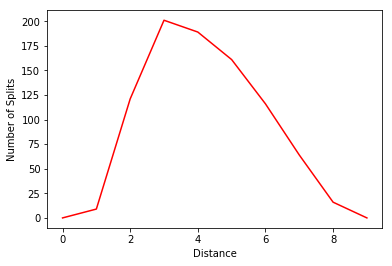

In [189]:

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(10), splits, 'r') # plotting t, a separately 
plt.xlabel('Distance')
plt.ylabel('Number of Splits')
plt.show()

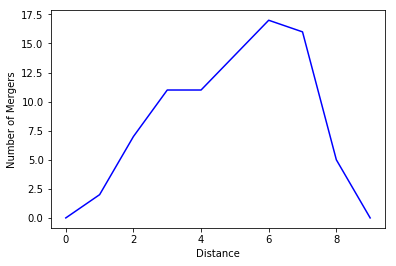

In [190]:
plt.plot(range(10), mergers, 'b') # plotting t, a separately 
plt.xlabel('Distance')
plt.ylabel('Number of Mergers')
plt.show()

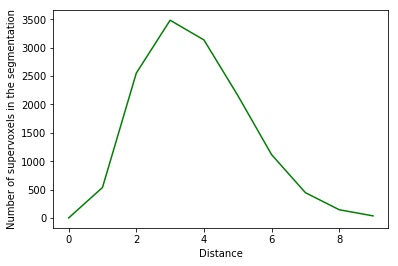

In [191]:
plt.plot(range(10), regionsD, 'g') # plotting t, a separately 
plt.xlabel('Distance')
plt.ylabel('Number of supervoxels in the segmentation')
plt.show()

In [192]:
rates=[]
for i in range(10):
    rates.append(100*float(mergers[i])/float(regionsD[i]))

In [193]:
splitrates=[]
for i in range(10):
    splitrates.append(100*float(splits[i])/float(regionsD[i]))

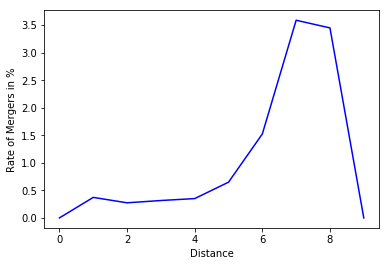

In [608]:
plt.plot(range(10), rates, 'b') # plotting t, a separately 
plt.xlabel('Distance')
plt.ylabel('Rate of Mergers in %')
plt.show()

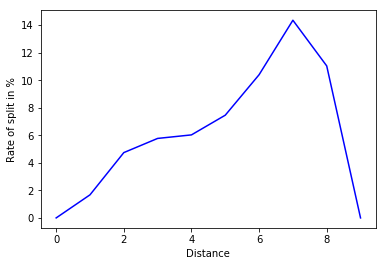

In [609]:
plt.plot(range(10), splitrates, 'b') # plotting t, a separately 
plt.xlabel('Distance')
plt.ylabel('Rate of split in %')
plt.show()

## Nyroglancer viz

In [611]:
viewer = nyroglancer.Viewer()
#viewer.add(multicut_final, name="multicut with unique indexes")
viewer.add(multicut3D[1][0], name="multicut 3d")
viewer.add(proba_final, name='proba')
viewer.add(rawfinal, name='raw')
viewer.show()

In [ ]:
multicut3D[0][0]

In [ ]:
multicut_final[0]